<a href="https://colab.research.google.com/github/Shraddha6999/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type   -**     Unsupervised
##### **Contribution   -**     Individual
##### **Team Member 1  -**     Shraddha Chandurkar


# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


As one of the world's largest streaming platforms, Netflix offers a vast library of movies and TV shows. However, with so many options to choose from, it can be challenging for users to find content that matches their preferences.

To address this challenge, this project aims to use unsupervised learning techniques to cluster similar movies and TV shows on Netflix. By grouping titles with similar attributes, we can provide users with more targeted recommendations, and help them find new content they will enjoy.

Specifically, this project will involve analyzing a dataset of Netflix titles, including features such as genre, release year, cast, and plot summary, among others. By applying clustering algorithms such as K-Means or Hierarchical clustering, we aim to identify groups of movies and TV shows with similar attributes.

Ultimately, the project aims to create a clustering model that can accurately group Netflix titles based on their characteristics. This model can then be used to make recommendations to users or to help Netflix improve its content discovery algorithms.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module_4_ML/Project/Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Dataset Size")
print("Rows = {} and  Columns = {}".format(df.shape[0], df.shape[1]))

Dataset Size
Rows = 7787 and  Columns = 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<AxesSubplot:>

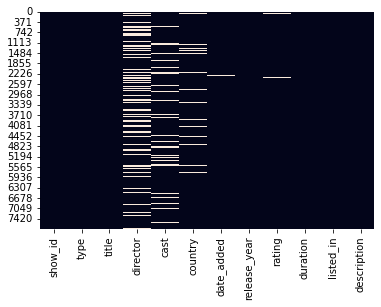

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description** : The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i , "is" , df[i].nunique(), ".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# Write your code to make your dataset analysis ready.

In [11]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [12]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [13]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.

In [14]:
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [15]:
# We cannot replace missing values in the 'date_added' column. 
# And since they constitute a small and relatively unimportant portion of the data.
# Therefore, we will exclude these values from our analysis.

In [16]:
df.dropna(subset=['date_added'], inplace=True)

In [17]:
df.shape

(7777, 12)

In [18]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.

In [19]:
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [21]:
# To simplify the analysis, we will choose the primary country and primary genre for each entry in the dataframe.

In [22]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [23]:
# We will transform the 'duration' column in the dataframe by splitting the string value 
# on whitespace delimiter and then converting it into an integer datatype.

In [24]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [25]:
# datatype of duration
df.duration.dtype

dtype('int64')

In [26]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [27]:
#Convert timestamp to datetime format to fetch the other details
df["date_added"] = pd.to_datetime(df['date_added'])

In [28]:
#addding new column to dataframe such as 'month_added'and 'year_added' to gain more insights from the data 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1) TYPE    (Univariate Analysis)

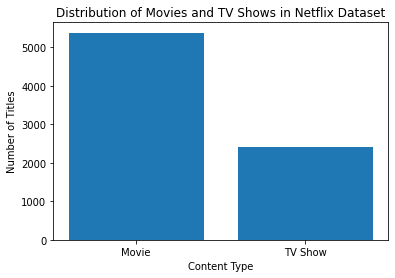

In [ ]:
# Chart - 1 visualization code

type_counts = df['type'].value_counts()        # Count the occurrences of each unique value in the 'type' column
plt.bar(type_counts.index, type_counts.values) # Create a bar chart of the type counts
plt.xlabel('Content Type')                     # Add labels and a title to the chart
plt.ylabel('Number of Titles')
plt.title('Distribution of Movies and TV Shows in Netflix Dataset')
plt.show()                                     # Show the chart

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2) DIRECTOR   (Univariate Analysis)

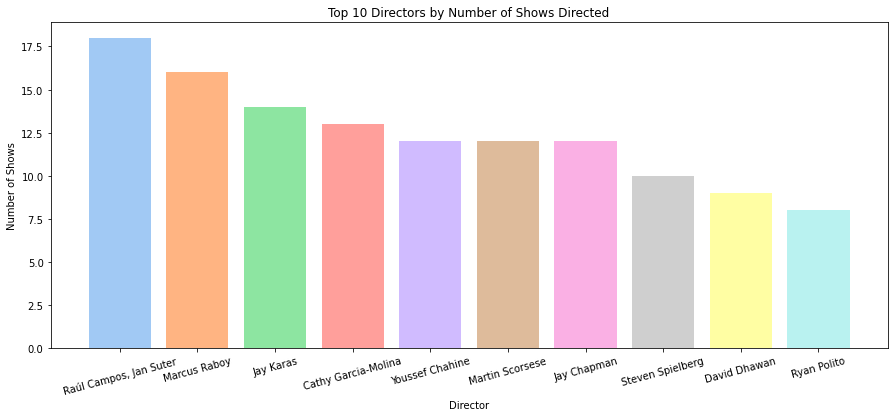

In [ ]:
# Chart - 2 visualization code
# Filter out the rows where the director is unknown, count the number of shows for each director, and plot the top 10
top_directors = df.loc[df['director'] != 'Unknown', 'director'].value_counts().nlargest(10)
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel', n_colors=10)
plt.bar(top_directors.index, top_directors.values, color=colors)
plt.title('Top 10 Directors by Number of Shows Directed')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3) CAST (Univariate Analysis)

Text(0, 0.5, 'Number of Shows')

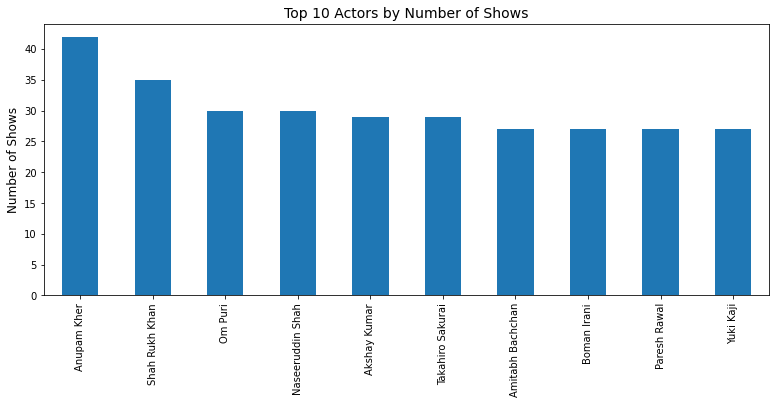

In [ ]:
# Chart - 3 visualization code
filtered_df = df[~(df['cast']=='Unknown')]                       # Filtering out unknown cast members
split_cast = filtered_df['cast'].str.split(', ', expand=True)    # split remaining cast into separate values
cast_values = split_cast.stack().reset_index(level=1, drop=True)
top_10_actors = cast_values.value_counts().nlargest(10)          #the top 10 actors by number of shows
top_10_actors.plot(kind='bar', figsize=(13,5))                   # Create a bar chart
plt.title('Top 10 Actors by Number of Shows', fontsize=14)       # Set chart title
plt.ylabel('Number of Shows', fontsize=12)                       #y-axis label

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4) COUNTRY (Univariate Analysis)

The top 3 countries account for 56.69% of shows in the dataset.
The top 10 countries account for 73.19% of shows in the dataset.


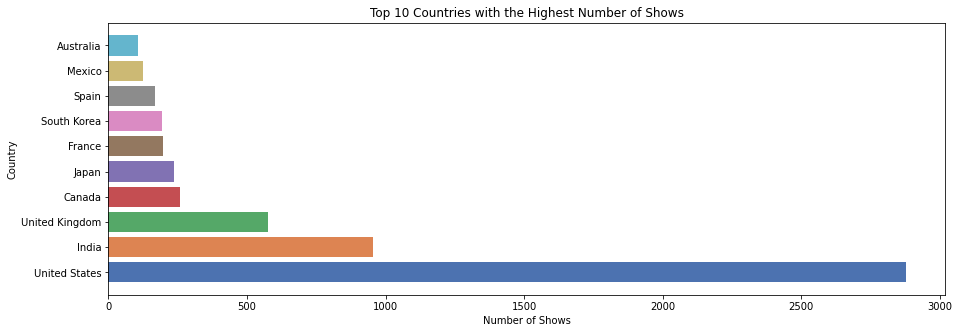

In [ ]:
# Chart - 4 visualization code
# Get the top 10 countries with the highest number of movies and TV shows in the dataset
top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
colors = sns.color_palette('deep', n_colors=10)
plt.barh(top_countries.index, top_countries.values, color=colors) # Plot a horizontal bar chart
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')

In [ ]:
# Calculate the percentage share of shows by the top 3 and top 10 countries
top_3_share = top_countries.nlargest(3).sum() / len(df) * 100
top_10_share = top_countries.sum() / len(df) * 100

# Print the percentage shares
print(f"The top 3 countries account for {top_3_share:.2f}% of shows in the dataset.")
print(f"The top 10 countries account for {top_10_share:.2f}% of shows in the dataset.")

The top 3 countries account for 56.69% of shows in the dataset.
The top 10 countries account for 73.19% of shows in the dataset.


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5) LISTED IN (Univariate Analysis)

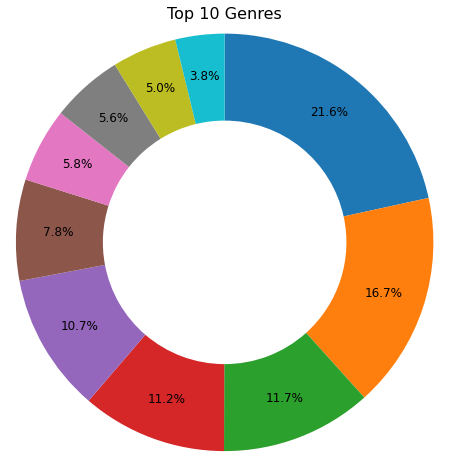

In [ ]:
# Chart - 5 visualization code
top_genres = df["listed_in"].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_genres, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1, 
        radius=1.2, wedgeprops=dict(width=0.5), startangle=90, 
        textprops=dict(color="black", fontsize=12), counterclock=False)
plt.title('Top 10 Genres', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6) RATING  (Univariate Analysis)

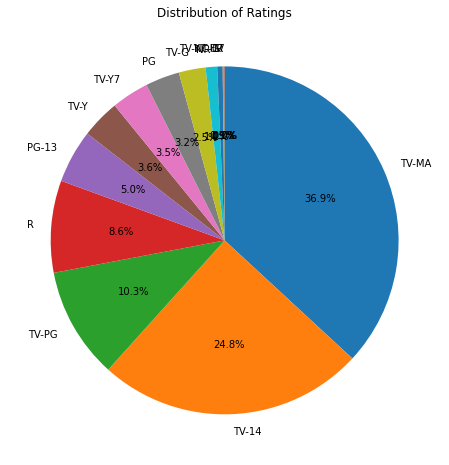

In [ ]:
# Chart - 6 visualization code
df_rating = df['rating'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(df_rating.values, labels=df_rating.index, 
        autopct='%1.1f%%',startangle=90, counterclock=False)
plt.title('Distribution of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7)  MONTH ADDED (Univariate Analysis)

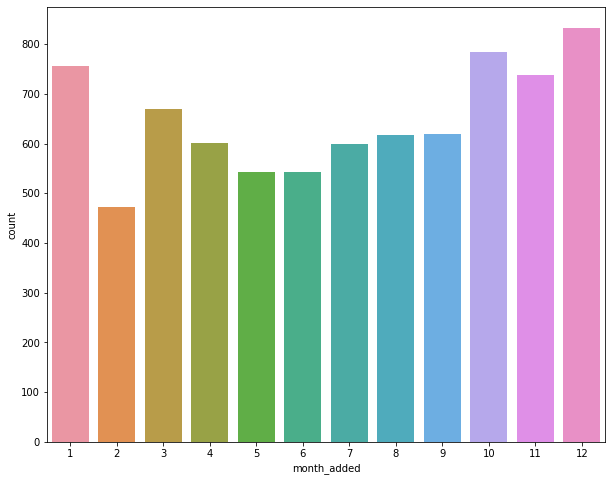

In [ ]:
# Chart - 7 visualization code
# Plotting the Countplot 
plt.figure(figsize=(10,8))
ax=sns.countplot(df['month_added'],data= df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8) TYPE VS DURATION  (Bivariate Analysis)

Text(0.5, 1.0, 'Number of Seasons per TV Show Distribution')

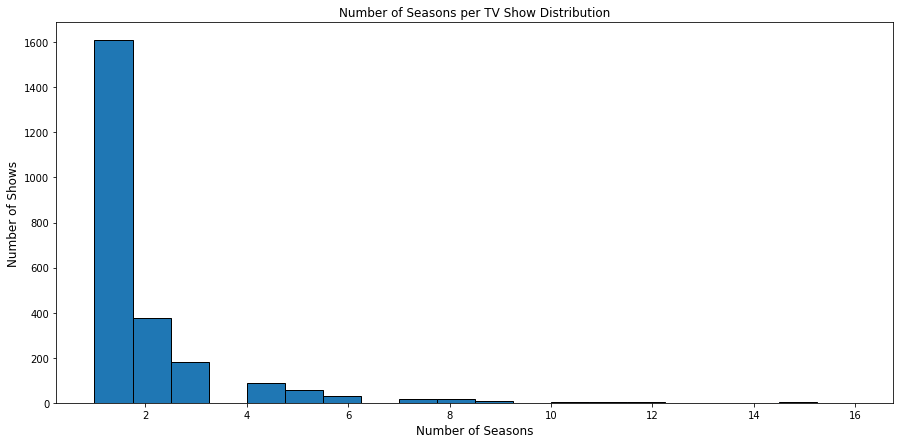

In [ ]:
# Chart - 8 visualization code
tv_shows = df[df['type'] == 'TV Show']                    # Filter the dataframe to only include TV shows
plt.figure(figsize=(15, 7))                               # Create a histogram of the number of seasons per TV show
plt.hist(tv_shows['duration'], bins=20, edgecolor='black')
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.title('Number of Seasons per TV Show Distribution')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9) RELEASE YEAR VS TYPE (Univariate Analysis)

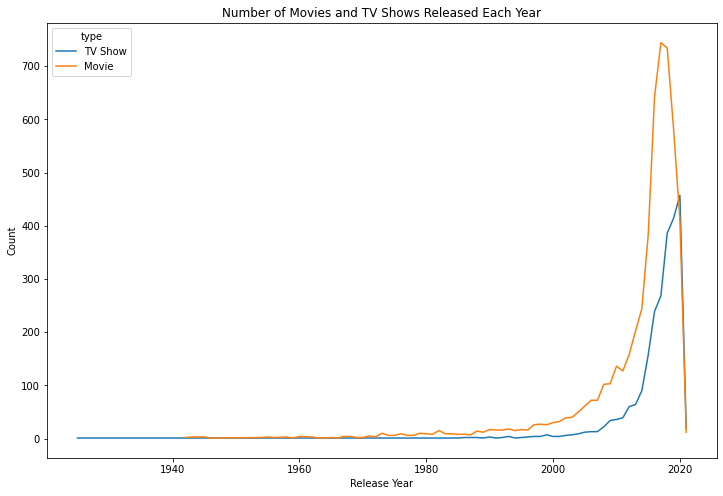

In [ ]:
# Chart - 9 visualization code
df_release_year = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_release_year, x='release_year', y='show_id', hue='type')
plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10) TYPE VS RELEASE YEAR (Bivariate Analysis)

In [ ]:
df.release_year.value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [ ]:
# We can observe from the visualization that the number of shows released on Netflix has increased significantly in recent years, 
# indicating that Netflix has gained more popularity in recent times.

Text(0.5, 1.0, 'Number of Shows Released Each Year Since 2008 on Netflix')

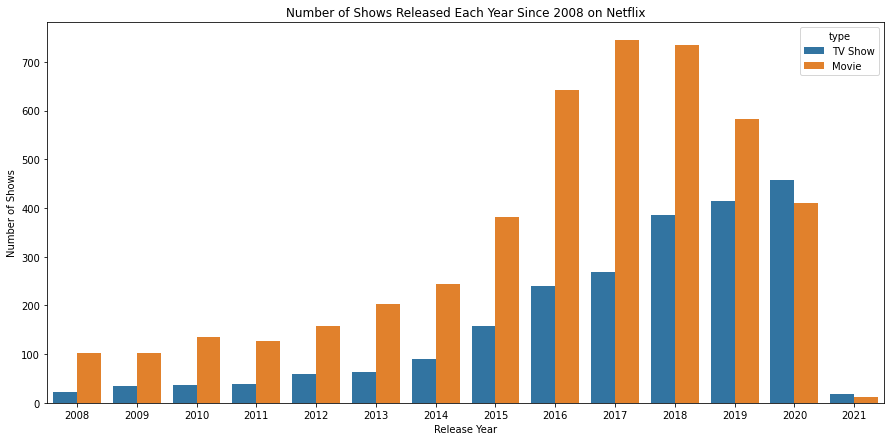

In [ ]:
# Chart - 10 visualization code
filtered_df = df[df['release_year'] >= 2008]
plt.figure(figsize=(15, 7))
sns.countplot(x='release_year', data=filtered_df, hue='type', order=range(2008, 2022))
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released Each Year Since 2008 on Netflix')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11) COUNTRY VS SHOW ID (Bivariate Analysis)

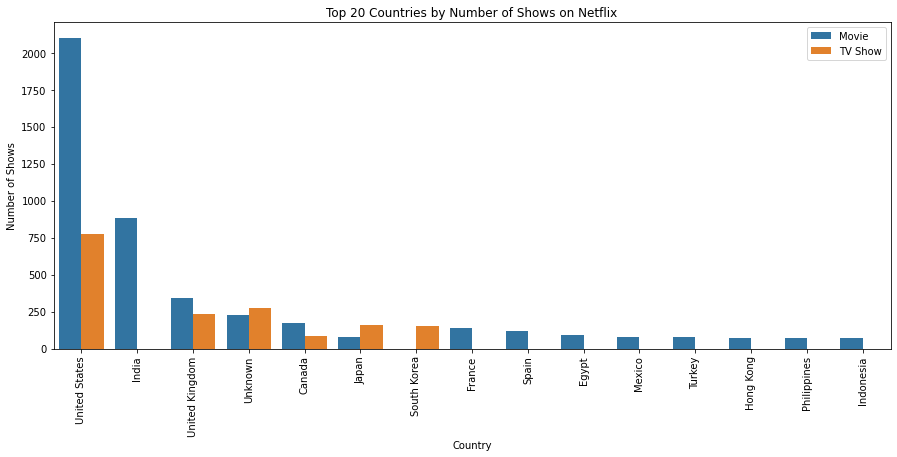

In [ ]:
# Chart - 11 visualization code
# group the data by country and type, and count the number of shows
df_country = df.groupby(['country', 'type'])['show_id'].count().reset_index()
df_country = df_country.sort_values(by='show_id', ascending=False)            # sort the data in descending order
plt.figure(figsize=(15, 6))
sns.barplot(data=df_country[:20], x='country', y='show_id', hue='type')       # plot a bar chart of the top 20 countries
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Top 20 Countries by Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12) CAST VS TV SHOW (Bivariate Analysis)

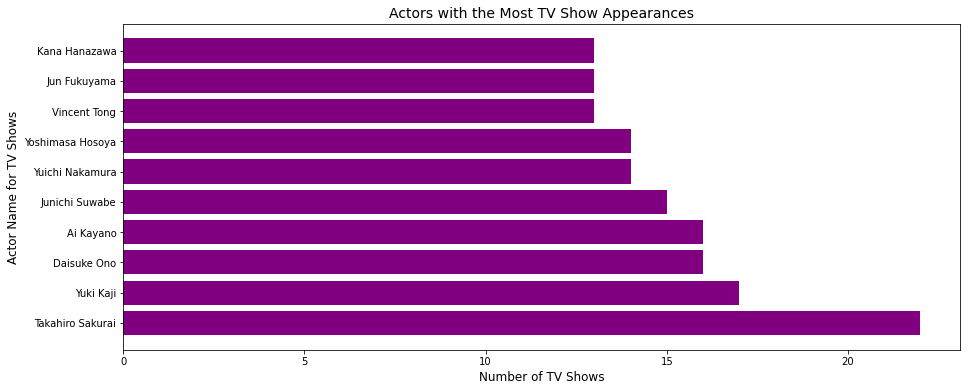

In [ ]:
# Chart - 12 visualization code
# Selecting TV shows with known cast information
tv_shows = df[(df['type'] == 'TV Show') & ~(df['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()
top_actors = actor_counts.head(10)             # Selecting the top 10 actors with the most TV show appearances
plt.figure(figsize=(15, 6))                    # Creating a horizontal bar plot of the top actors
plt.barh(top_actors.index, top_actors.values, color='purple')
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13) WORDCLOUD

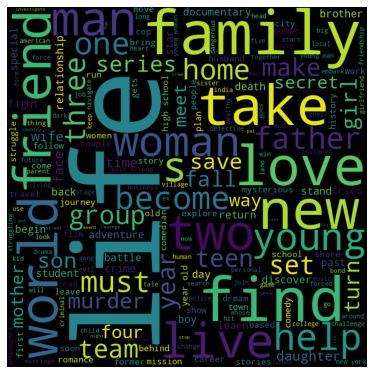

In [ ]:
# Chart - 13 visualization code
# Join all the movie descriptions together into a single string
comment_words = ' '.join(df['description'].astype(str).str.lower())
stopwords = set(STOPWORDS)                                   # Define the stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)
plt.figure(figsize=(10,5), facecolor=None)                   # Plot the word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()                                                   # Display the plot

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14) Correlation Heatmap (Multivariate Analysis)

<AxesSubplot:>

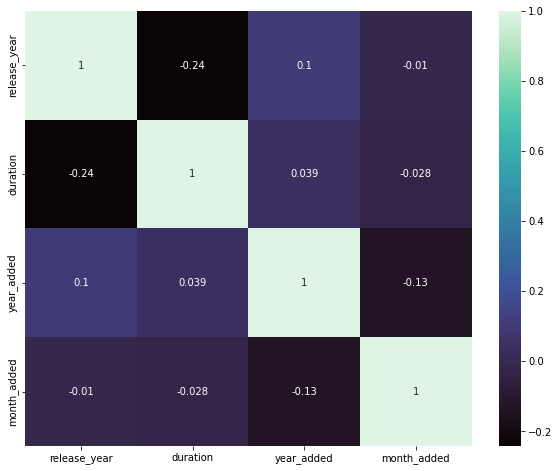

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15) Pair Plot (Multivariate Analysis)

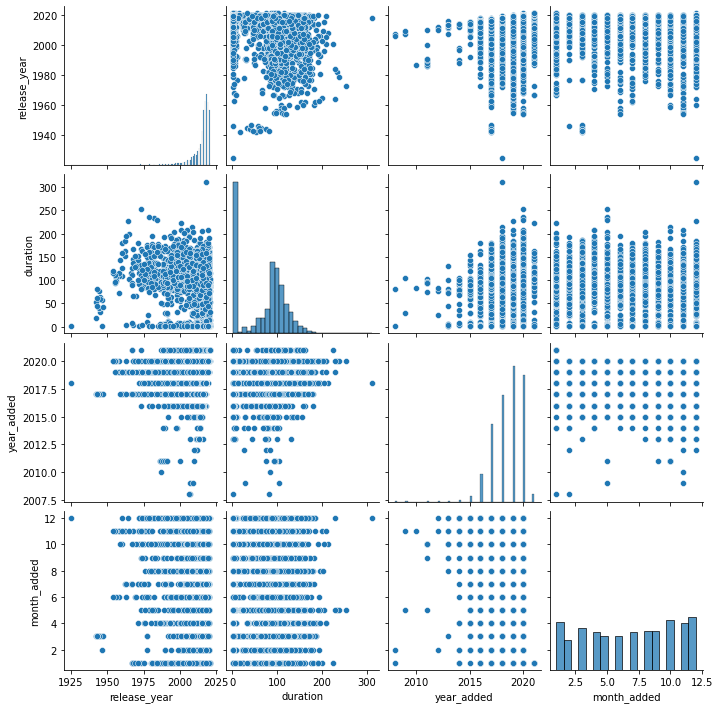

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1:** The difference in the average duration of movies and TV shows on Netflix.

**Hypothesis 2:** Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

**Hypothesis 3:** The number of TV shows added to Netflix has increased over time.

### Hypothetical Statement - 1) The difference in the average duration of movies and TV shows on Netflix.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - There is no significant difference in the average duration of movies and TV shows on Netflix.

Alternative Hypothesis(H1) - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
from scipy.stats import ttest_ind

# Extract the durations of movies and TV shows from the dataset
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis. There is a significant difference in the average duration of movies and TV shows on Netflix.


In [ ]:
## There is a significant difference in the average duration of movies and TV shows on Netflix.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the two-sample t-test. This test was chosen because we are comparing the means of two independent samples (movie durations and TV show durations), and we want to determine whether the difference between the sample means is statistically significant or could have occurred by chance.

##### Why did you choose the specific statistical test?

The two-sample t-test assumes that the samples are normally distributed, the variances of the two samples are not equal, and the samples are independent. In this case, we assumed that the duration of movies and TV shows on Netflix are normally distributed, and that the two samples are independent. The assumption of unequal variances was also made because the variance of movie durations and TV show durations may be different due to the nature of the content

### Hypothetical Statement - 2) Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : There is no significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

Alternate hypothesis : There is a significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
from scipy.stats import ttest_ind

# Extract the number of seasons for TV shows produced in the US and outside the US
# Extract the number of seasons for TV shows produced in the US and outside the US
us_shows = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')]
us_shows_seasons = us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

non_us_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'United States')]
non_us_shows_seasons = non_us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

# Perform two-sample t-test
stat, p = ttest_ind(us_shows_seasons, non_us_shows_seasons, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis.


In [ ]:
#  There is a significant difference in the average number of seasons for TV shows on Netflix
#  between those produced in the United States and those produced outside of the United States.

##### Which statistical test have you done to obtain P-Value?

The statistical test used here is a two-sample t-test. This test is used to compare the means of two independent samples and determine if they are statistically different from each other. 

##### Why did you choose the specific statistical test?

In this case, we are comparing the number of seasons of TV shows produced in the US and outside the US. We chose this test because we want to determine if there is a statistically significant difference in the mean number of seasons between the two groups. We also assumed that the variances of the two groups are not equal, so we set the equal_var parameter to False when calling the ttest_ind() function.





### Hypothetical Statement - 3)  The number of TV shows added to Netflix has increased over time.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The mean number of TV shows added to Netflix per year has not changed over time.

Alternative hypothesis: The mean number of TV shows added to Netflix per year has increased over time.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
from scipy import stats
from scipy.stats import ttest_ind

# Extract the year from the date_added column
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# Extract the number of TV shows added to Netflix each year
tv_shows = df[df['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby('year_added').size()

# Perform a linear regression to test for a positive slope (i.e., an increase over time)
slope, intercept, r_value, p_value, std_err = stats.linregress(tv_shows_by_year.index, tv_shows_by_year)

# Print the p-value
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis. The number of TV shows added to Netflix has increased over time.")


p-value: 0.062841095395341
Failed to reject null hypothesis.


In [ ]:
# It means the mean number of TV shows added to Netflix per year has not changed over time.

##### Which statistical test have you done to obtain P-Value?

In this code, a linear regression is performed using the stats.linregress function from the scipy module. The purpose of the regression is to test for a positive slope (i.e., an increase over time) in the number of TV shows added to Netflix each year. The p-value is then calculated based on the results of the regression.

A p-value is a measure of the evidence against the null hypothesis. In this case, the null hypothesis is that the number of TV shows added to Netflix has not increased over time (i.e., the slope is zero). The alternative hypothesis is that the number of TV shows added to Netflix has increased over time (i.e., the slope is positive).

##### Why did you choose the specific statistical test?

The specific statistical test used in this code is a linear regression with a hypothesis test on the slope coefficient. This is appropriate because we are interested in testing for a trend over time, and a linear regression allows us to model the relationship between the year and the number of TV shows added to Netflix. The p-value calculated from the regression provides evidence for or against the alternative hypothesis that there is a positive trend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

<AxesSubplot:>

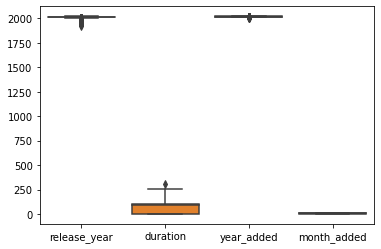

In [30]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [31]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [32]:
# Expand Contraction
df['organized'] =(df['description'].astype(str) + ' ' + 
                  df['listed_in'].astype(str)   + ' ' + 
                  df['rating'].astype(str)      + ' ' + 
                  df['cast'].astype(str)        + ' ' + 
                  df['country'].astype(str)     + ' ' + 
                  df['director'].astype(str))

In [33]:
df.organized[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows TV-MA João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil Unknown'

#### 2. Lower Casing

In [34]:
# Lower Casing
df['Lower_casing']= df['organized'].str.lower()

In [35]:
df.Lower_casing[0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows tv-ma joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil unknown'

#### 3. Removing Punctuations

In [36]:
# Remove Punctuations
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [37]:
def remove_punctuation(text):
    # remove punctuation from text
    return text.translate(str.maketrans('', '', string.punctuation))

In [38]:
df['cleaned_text'] = df['Lower_casing'].apply(remove_punctuation)

In [39]:
df.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tvma joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil unknown'

#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs & Remove words and digits contain digits

In [41]:
import re

In [42]:
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]", "", str(x))

def remove_urls(text):
    cleaned_text = re.sub(r'http\S+', '', text)
    return cleaned_text

def remove_digits(text):
    cleaned_text = re.sub(r'\w*\d\w*', '', text)
    return cleaned_text

In [43]:
df['removed_words']  = df['cleaned_text'].apply(cleaned)
df['removed_url']    = df['removed_words'].apply(remove_urls)
df['removed_digits'] = df['removed_url'].apply(remove_digits)

#### 5. Removing Stopwords & Removing White spaces

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [46]:
df['removed_stopwords'] = df['removed_digits'].apply(remove_stopwords)
df.removed_stopwords[0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tvma joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil unknown'

In [47]:
# Remove White spaces
def remove_whitespaces(text):
    cleaned_text = text.strip()
    return cleaned_text

In [48]:
df['removed_whitespaces']=df['removed_stopwords'].apply(remove_whitespaces)
df['removed_whitespaces'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: removed_whitespaces, dtype: object

#### 6. Rephrase Text

In [49]:
# Rephrase Text
#!pip install rephrase

In [50]:
#from rephrase import Rephraser

In [51]:
#rephraser = Rephraser()
#def rephrase_sentence(sentence):
#    return rephraser.rephrase(sentence)

In [52]:
#df['rephrased_text'] = df['removed_whitespaces'].apply(rephrase_sentence)

#### 7. Tokenization

In [53]:
# Tokenization
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [54]:
df['tokenized'] = df['removed_whitespaces'].apply(tokenize_text)

In [55]:
df['tokenized'].head()

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tokenized, dtype: object

#### 8. Text Normalization

In [56]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def normalize_text(tokens):
    stemmer = SnowballStemmer('english')          # apply stemming to tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()              # apply lemmatization
    normalized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    normalized_text = ' '.join(normalized_tokens) # join normalized tokens 
    return normalized_text

In [58]:
df['normalized'] = df['tokenized'].apply(normalize_text)

In [59]:
df['normalized'].head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: normalized, dtype: object

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [60]:
# POS Taging
#nltk.download('averaged_perceptron_tagger')

In [61]:
#def pos_tagging(text):
#    tagged_tokens = nltk.pos_tag(text) # perform POS tagging on tokens
#    return tagged_tokens                 # return list of (word, POS tag) tuples

In [62]:
#df['tagged'] = df['tokenized'].apply(lambda x: pos_tagging(x))
#df['tagged'] = df['tagged'].apply(lambda x: [str(t) for t in x])

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

In [64]:
new_df = df[['title', 'normalized']]
new_df.head()

,title,normalized
0,3%,futur elit inhabit island paradis far crowd sl...
1,7:19,devast earthquak hit mexico citi trap survivor...
2,23:59,armi recruit found dead fellow soldier forc co...
3,9,postapocalypt world ragdol robot hide fear dan...
4,21,brilliant group student becom cardcount expert...


In [65]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
     
t_vectorizer = TfidfVectorizer(max_features=20000)
x= t_vectorizer.fit_transform(new_df['normalized'])

x.shape

(7777, 20000)

In [66]:
#corpus = df['tagged'].apply(lambda x: ' '.join(x)).tolist()
#tfidf_vectorizer = TfidfVectorizer()          # create TfidfVectorizer object
#x = tfidf_vectorizer.fit_transform(corpus)    # fit and transform the corpus 
#x = x.todense()                               # convert tfidf_matrix to a dense matrix
#x = pd.DataFrame(dense_matrix, columns=tfidf_vectorizer.get_feature_names()) # create a DataFrame 
#print(tfidf_df.head())

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [67]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [69]:
# Transform Your data

### 6. Data Scaling

In [70]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [71]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x.toarray())

PCA()

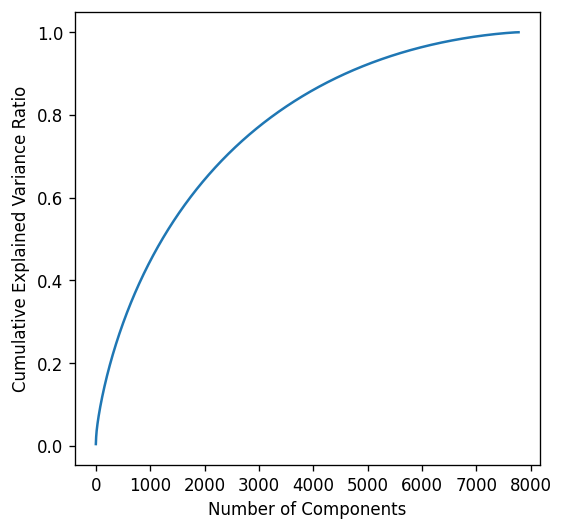

In [72]:
# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio versus the number of components
plt.figure(figsize=(5, 5), dpi=120)
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [76]:
pca_tuned = PCA(n_components=0.95)
x_dense = x.toarray()
pca_tuned.fit(x_dense)
x = pca_tuned.transform(x_dense)
print(x.shape)

(7777, 5610)


In [77]:
x

array([[ 6.09783439e-02, -4.59862486e-02, -1.17952732e-02, ...,
        -2.05743725e-04, -3.64799283e-03,  2.66598814e-03],
       [-3.61528356e-02, -2.22493359e-02,  2.54561519e-02, ...,
         1.66932084e-03, -1.14071123e-02,  1.00295204e-02],
       [-4.27193833e-02, -2.98666204e-02, -5.82637527e-02, ...,
        -7.88277332e-03,  1.55839913e-02,  9.50936430e-03],
       ...,
       [ 1.26436056e-01,  1.11070699e-01,  1.10942784e-01, ...,
        -1.02831970e-02, -8.46380650e-03,  3.23695868e-03],
       [ 8.02277360e-02, -3.16093213e-02, -5.94138912e-03, ...,
        -5.69354630e-03,  5.17526554e-03,  7.87104527e-03],
       [ 1.25335896e-01,  2.22436014e-01,  1.64685092e-01, ...,
         1.76424996e-03, -5.90939105e-03, -3.48306004e-03]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [73]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [74]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Determine the optimal number of clusters

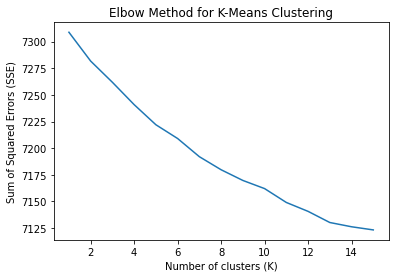

In [78]:
# Create a list to store the sum of squared errors for each K value
Sum_of_Squared_Errors = []

# Iterate over range of K values and compute SSE for each value
for k in range(1, 16):
    # Initialize the k-means model with the current value of K
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Compute the sum of squared errors for the model
    Sum_of_Squared_Errors.append(kmeans.inertia_)

# Plot the SSE values against the range of K values
plt.plot(range(1, 16), Sum_of_Squared_Errors)
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

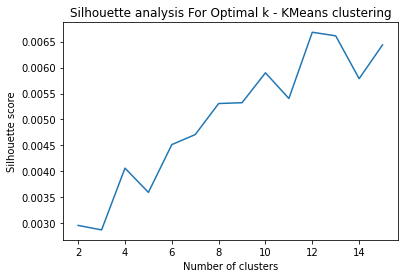

In [79]:
# Silhouette score method to find the optimal value of k
# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
    # Initialize the k-means model with the current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Predict the cluster labels for each point in the data
    labels = kmeans.labels_
    # Compute the silhouette score for the model
    score = silhouette_score(x, labels)
    silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [86]:
# ML Model - 1 Implementation
# Initialize the KMeans model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(x)               # Fit the Algorithm
y_kmeans = kmeans_model.predict(x)# Predict on the model
labels = kmeans_model.labels_     # Get the cluster labels for each point in the data
unique_labels = np.unique(labels) # Get the unique cluster labels

In [93]:
# Adding a k-means cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

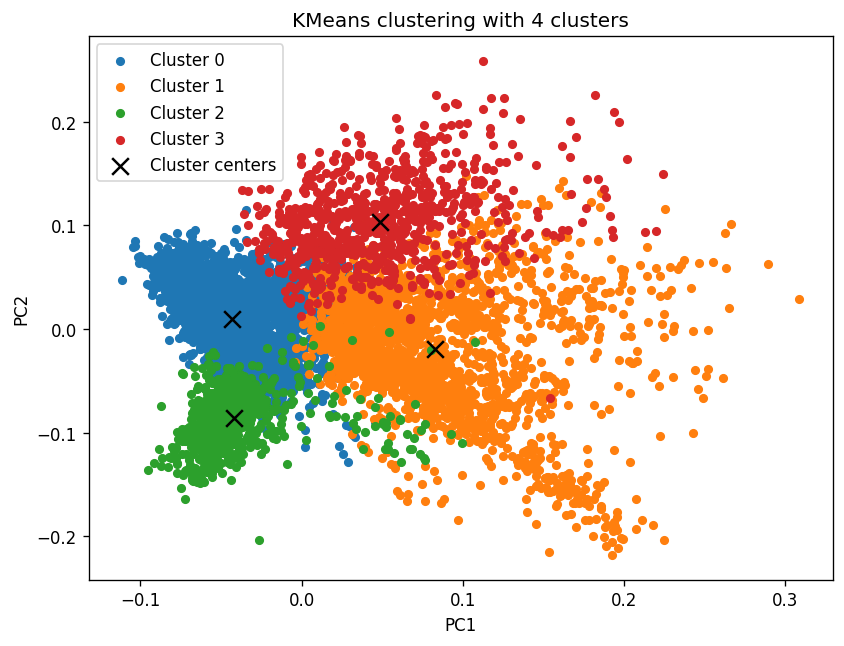

In [87]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels:
    plt.scatter(x[labels == i, 0], x[labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, marker='x', c='black', label='Cluster centers')
plt.title('KMeans clustering with {} clusters'.format(len(unique_labels)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [88]:
def kmeans_wordcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['kmeans_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
  
  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])
  
  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Plot the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

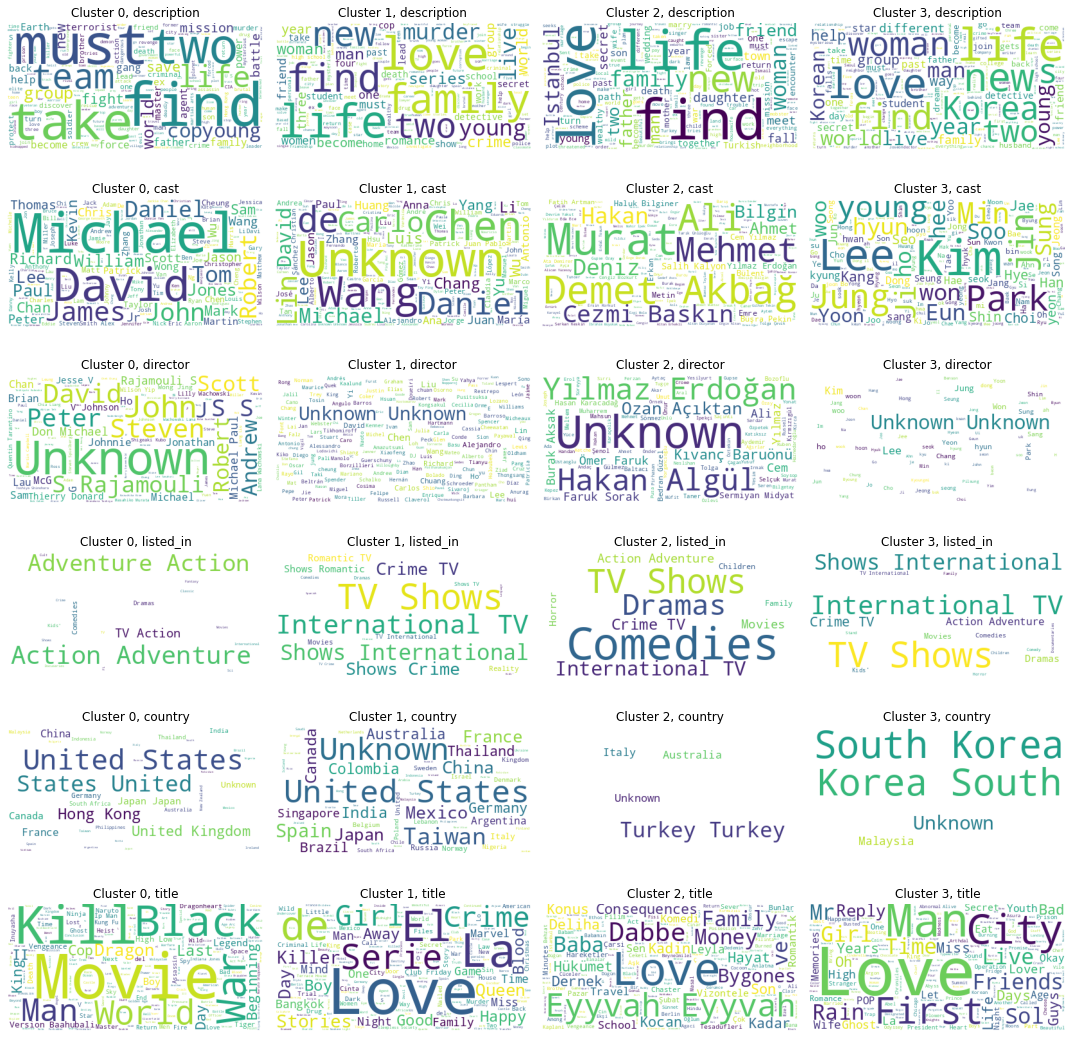

In [103]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

for i in range(4):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')
        
plt.tight_layout()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***